<a href="https://colab.research.google.com/github/fernandodeeke/epidemias/blob/main/seirs_discreto_parametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Função que simula o modelo SEIRS
def simula_seirs(beta, sigma, gamma, omega, N, dt, T):

    passos = int(T / dt) + 1 # Inclui o ponto inicial
    S = np.zeros(passos)
    E = np.zeros(passos)
    I = np.zeros(passos)
    R = np.zeros(passos)
    tempo = np.linspace(0, T, passos) # Vetor de tempo

    # Condições iniciais
    E[0] = 10. # Número inicial de expostos
    I[0] = 0.0 # Número inicial de infectados
    S[0] = N-E[0]-I[0] # Número inicial de suscetíveis
    R[0] = 0.0 # Número inicial de recuperados

    for t in range(passos - 1):
       S[t+1]=S[t]+(-beta*S[t]*I[t]/N+omega*R[t])*dt
       E[t+1]=E[t]+(beta*S[t]*I[t]/N-sigma*E[t])*dt
       I[t+1] =I[t]+(sigma*E[t]-gamma*I[t])*dt
       R[t+1]=R[t]+(gamma*I[t]-omega*R[t])*dt

    return np.array(S), np.array(I)

N = 10000 # População total
dt = 1.0 # Passo de tempo
Ts = 1825 # Comprimento da simulação (dias)

# Taxas
params_1 = {'beta': 0.5, 'sigma': 1/7, 'gamma': 1/5, 'omega': 1/365}
params_2 = {'beta': 0.7, 'sigma': 1/7, 'gamma': 1/5, 'omega': 1/365}
params_3 = {'beta': 0.5, 'sigma': 1/7, 'gamma': 1/5, 'omega': 1/180}


# Simulação para cada conjunto de parâmetros
S1, I1 = simula_seirs(**params_1, N=N, dt=dt, T=Ts)
S2, I2 = simula_seirs(**params_2, N=N, dt=dt, T=Ts)
S3, I3 = simula_seirs(**params_3, N=N, dt=dt, T=Ts)


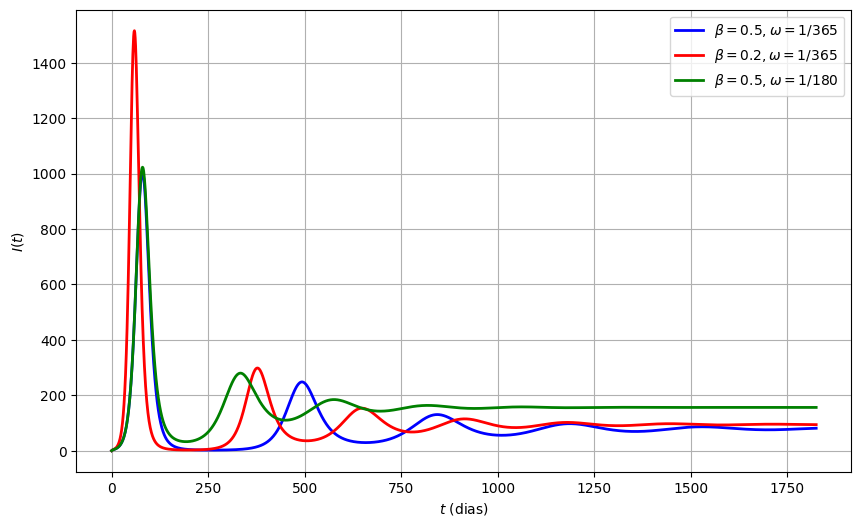

In [22]:
passos = int(Ts / dt) + 1
tempo = np.linspace(0, Ts, passos)

# Gráfico
plt.figure(figsize=(10, 6), dpi=100)

plt.plot(tempo, I1,  lw=2, label=r"$\beta=0.5, \omega=1/365$", color='blue')
plt.plot(tempo, I2,  lw=2, label=r"$\beta=0.2, \omega=1/365$", color='red')
plt.plot(tempo, I3, lw=2, label=r"$\beta=0.5, \omega=1/180$", color='green')
plt.xlabel("$t$ (dias)")
plt.ylabel("$I(t)$")
plt.legend()
plt.grid()
plt.savefig("seirs_parametros.png", dpi=300)  # Salva em alta resolução
plt.show()

In [23]:
# Equilíbrio endêmico
equilibrio_I1 = I1[-1]
equilibrio_I2 = I2[-1]
equilibrio_I3 = I3[-1]
print("Equilíbrio endêmico (% da população):")
print(f"1: I1 = {equilibrio_I1*100/N:.2f}%")
print(f"2: I2 = {equilibrio_I2*100/N:.2f}%")
print(f"3: I3 = {equilibrio_I3*100/N:.2f}%")

Equilíbrio endêmico (% da população):
1: I1 = 0.81%
2: I2 = 0.94%
3: I3 = 1.56%


In [24]:
# Função para intervalos interepidêmicos
def derivada(y,x):
   dy = np.zeros_like(y, dtype=float)
   dx = x[1] - x[0]
   dy[:-1] = (y[1:] - y[:-1])
   dy[-1] = (y[-1] - y[-2]) # diferenca atrasada para o ultimo termo
   return dy/dx

In [25]:
# Máximos para cada array
dI1 = derivada(I1,tempo)
dI2 = derivada(I2,tempo)
dI3 = derivada(I3,tempo)
extremos1 = tempo[1:][dI1[1:]*dI1[:-1]<0]
extremos2 = tempo[1:][dI2[1:]*dI2[:-1]<0]
extremos3 = tempo[1:][dI3[1:]*dI3[:-1]<0]
maximos1 = extremos1[::2]
maximos2 = extremos2[::2]
maximos3 = extremos3[::2]
T1 = np.diff(maximos1)
T2 = np.diff(maximos2)
T3 = np.diff(maximos3)

print(T1 , T2, T3)


[413. 351. 343. 342.] [319. 271. 266. 265. 266. 266.] [254. 242. 243. 243. 244. 244. 243.]


In [26]:
# Cálculo das derivadas
dI1 = derivada(I1, tempo)
dI2 = derivada(I2, tempo)
dI3 = derivada(I3, tempo)

# Extremos
extremos1 = tempo[1:][dI1[1:] * dI1[:-1] < 0]
extremos2 = tempo[1:][dI2[1:] * dI2[:-1] < 0]
extremos3 = tempo[1:][dI3[1:] * dI3[:-1] < 0]

# Máximos
maximos1 = extremos1[::2]
maximos2 = extremos2[::2]
maximos3 = extremos3[::2]

# Período dos máximos sucessivos
T1 = np.diff(maximos1)
T2 = np.diff(maximos2)
T3 = np.diff(maximos3)

print("Período dos máximos sucessivos:")
print("-" * 40)
print(f"Caso 1 (β=0.5, ω=1/365):")
for i, periodo in enumerate(T1, start=1):
    print(f"  T{i}: {periodo:.2f} dias")
print(f"Equilibrio I1 = {I1[-1]}")
print("-" * 40)

print(f"Caso 2 (β=0.2, ω=1/365):")
for i, periodo in enumerate(T2, start=1):
    print(f"  T{i}: {periodo:.2f} dias")
print(f"Equilibrio I2 = {I2[-1]}")
print("-" * 40)

print(f"Caso 3 (β=0.5, ω=1/180):")
for i, periodo in enumerate(T3, start=1):
    print(f"  T{i}: {periodo:.2f} dias")
print(f"Equilibrio I3 = {I3[-1]}")
print("-" * 40)

Período dos máximos sucessivos:
----------------------------------------
Caso 1 (β=0.5, ω=1/365):
  T1: 413.00 dias
  T2: 351.00 dias
  T3: 343.00 dias
  T4: 342.00 dias
Equilibrio I1 = 81.16630950447903
----------------------------------------
Caso 2 (β=0.2, ω=1/365):
  T1: 319.00 dias
  T2: 271.00 dias
  T3: 266.00 dias
  T4: 265.00 dias
  T5: 266.00 dias
  T6: 266.00 dias
Equilibrio I2 = 94.15123832255011
----------------------------------------
Caso 3 (β=0.5, ω=1/180):
  T1: 254.00 dias
  T2: 242.00 dias
  T3: 243.00 dias
  T4: 243.00 dias
  T5: 244.00 dias
  T6: 244.00 dias
  T7: 243.00 dias
Equilibrio I3 = 156.27644095654492
----------------------------------------


In [27]:
# Determina os pontos de equilíbrio
equilibrium_S1 = S1[-1]
equilibrium_I1 = I1[-1]

equilibrium_S2 = S2[-1]
equilibrium_I2 = I2[-1]

equilibrium_S3 = S3[-1]
equilibrium_I3 = I3[-1]


In [28]:
print("Pontos de equilíbrio:")
print(f"1: S = {equilibrium_S1:.2f}, I = {equilibrium_I1:.2f}")
print(f"2: S = {equilibrium_S2:.2f}, I = {equilibrium_I2:.2f}")
print(f"3: S = {equilibrium_S3:.2f}, I = {equilibrium_I3:.2f}")


Pontos de equilíbrio:
1: S = 4024.30, I = 81.17
2: S = 2854.73, I = 94.15
3: S = 3999.80, I = 156.28


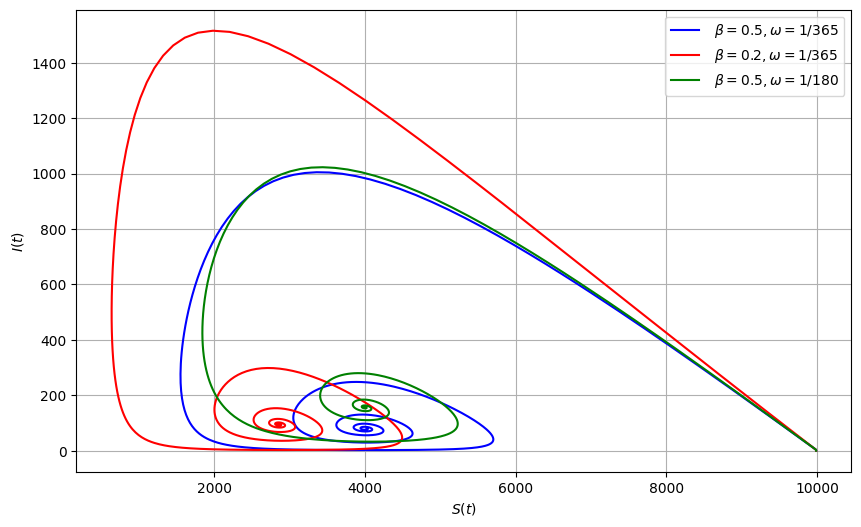

In [29]:
# Gráfico do espaço de fase
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(S1, I1, label=r" $\beta=0.5, \omega=1/365$", color='blue')
plt.plot(S2, I2, label=r" $\beta=0.2, \omega=1/365$", color='red')
plt.plot(S3, I3, label=r" $\beta=0.5, \omega=1/180$", color='green')
plt.xlabel("$S(t)$")
plt.ylabel("$I(t)$")
plt.legend()
plt.grid()
plt.savefig("seirs_fase.png", dpi=300)  # Salva em alta resolução
plt.show()